In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import collecting_data_1

In [2]:
daily_returns_act, covariance_act, qrt_ret_act, qrt_variance_act = collecting_data_1.get_daily_data()

C:\Users\ss_fl\Downloads\Classes\cov matrix\Sapiat_final\collecting_data_1.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_returns['year'] = daily_returns['date'].dt.year
C:\Users\ss_fl\Downloads\Classes\cov matrix\Sapiat_final\collecting_data_1.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_returns['month'] = daily_returns['date'].dt.month
C:\Users\ss_fl\Downloads\Classes\cov matrix\Sapiat_final\collecting_data_1.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [3]:
hist_data = collecting_data_1.get_historical_data(daily_returns_act,qrt_ret_act,qrt_variance_act)

C:\Users\ss_fl\Downloads\Classes\cov matrix\Sapiat_final\collecting_data_1.py:133: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Yq += [cov_ravelled[[(1, 2, 3, 6, 7, 11)]]]
C:\Users\ss_fl\Downloads\Classes\cov matrix\Sapiat_final\collecting_data_1.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qrt_covariance_his['date'] = qrt_ret_his.index.values


         bondsp500_his  goldsp500_his  forexsp500_his  goldbond_his  \
1983-Q1  -3.209815e-09  -8.626241e-11   -1.000513e-08  7.070249e-10   
1983-Q2  -3.345442e-09   1.865968e-08   -2.971246e-09 -1.626164e-09   
1983-Q3   2.817079e-09   1.083472e-07   -2.127370e-09  7.097998e-09   
1983-Q4  -2.298185e-10   2.547324e-08   -9.381267e-09 -3.144723e-10   
1984-Q1  -5.804746e-10  -3.790189e-08    2.223926e-08  6.997180e-10   
...                ...            ...             ...           ...   
2019-Q1   4.938924e-10   1.409798e-09    6.518637e-09 -1.228764e-11   
2019-Q2  -2.624186e-10  -9.608368e-09    6.737340e-09  4.737864e-10   
2019-Q3  -1.580984e-10  -2.169841e-08   -7.758532e-10  3.086163e-10   
2019-Q4  -2.064916e-10  -2.281441e-08   -9.024659e-09  8.818965e-11   
2020-Q1  -1.497507e-09  -7.540264e-10   -1.313582e-08  4.113613e-11   

         forexbond_his  goldforex_his  
1983-Q1   7.553990e-10  -3.357168e-10  
1983-Q2  -2.661378e-10  -2.115941e-09  
1983-Q3  -6.161802e-10  -9.

In [4]:
macroeco = collecting_data_1.get_macroecofact()

In [5]:
combined_df, reg_data = collecting_data_1.get_reg_data(macroeco,covariance_act,qrt_ret_act,qrt_variance_act)

In [6]:
prediction_list_cov, prediction_list_var = collecting_data_1.get_predicted_values(reg_data)

In [7]:
final_csv = collecting_data_1.get_step2_csv(reg_data,prediction_list_cov,prediction_list_var,hist_data)

In [8]:
final_csv.columns

Index(['equity_qrt_ret_act', 'bond_qrt_ret_act', 'forex_qrt_ret_act',
       'gold_qrt_ret_act', 'bond_equity_cov_act', 'forex_equity_cov_act',
       'gold_equity_cov_act', 'forex_bond_cov_act', 'gold_bond_cov_act',
       'gold_forex_cov_act', 'equity_var_act', 'bond_var_act', 'gold_var_act',
       'forex_var_act', 'equity_ret_his', 'bond_ret_his', 'gold_ret_his',
       'forex_ret_his', 'equity_var_his', 'bond_var_his', 'forex_var_his',
       'gold_var_his', 'bond_equity_cov_his', 'forex_equity_cov_his',
       'gold_equity_cov_his', 'forex_bond_cov_his', 'gold_bond_cov_his',
       'gold_forex_cov_his', 'bond_equity_cov_hat', 'bond_forex_cov_hat',
       'equity_forex_cov_hat', 'bond_gold_cov_hat', 'equity_gold_cov_hat',
       'forex_gold_cov_hat', 'equity_var_hat', 'bond_var_hat', 'gold_var_hat',
       'forex_var_hat'],
      dtype='object')

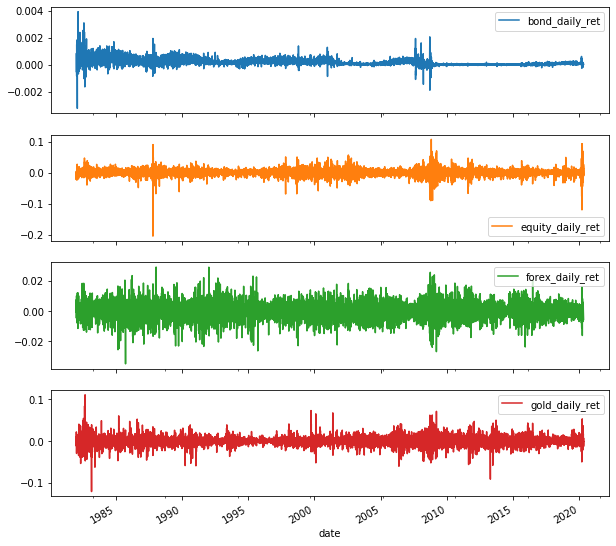

In [9]:
daily_returns_act.set_index('date')[['bond_daily_ret','equity_daily_ret','forex_daily_ret','gold_daily_ret']].plot(subplots=True, figsize=(10,10))
pass

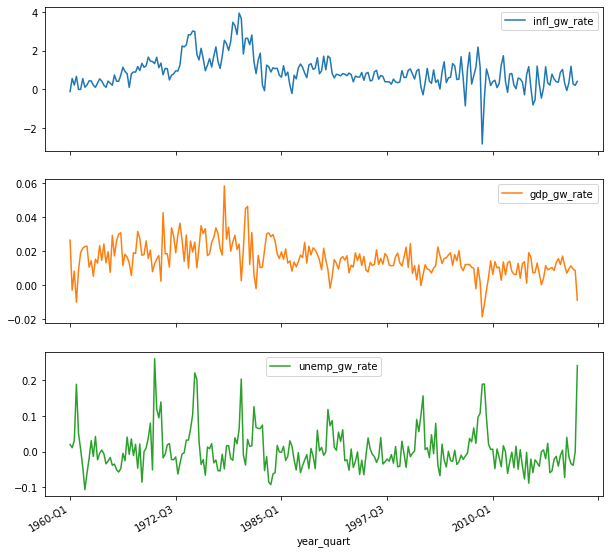

In [10]:
macroeco.set_index('year_quart')[['infl_gw_rate','gdp_gw_rate','unemp_gw_rate']].plot(subplots=True, figsize=(10,10))
pass

In [11]:
plot_data = combined_df[['bondsp500_act','goldsp500_act','forexsp500_act','goldbond_act',\
               'forexbond_act','goldforex_act']]

plot_data = plot_data.transpose()


fig = go.Figure(data=go.Heatmap(
        z=plot_data,
        x=plot_data.columns,
        y=['bondsp500_act','goldsp500_act','forexsp500_act','goldbond_act',\
               'forexbond_act','goldforex_act'],
        colorscale=['red','green']))

fig.update_layout(
    title='Covariance between assets from 1982-Q1 to 2020-Q1',
    xaxis_nticks=50)

fig.show()

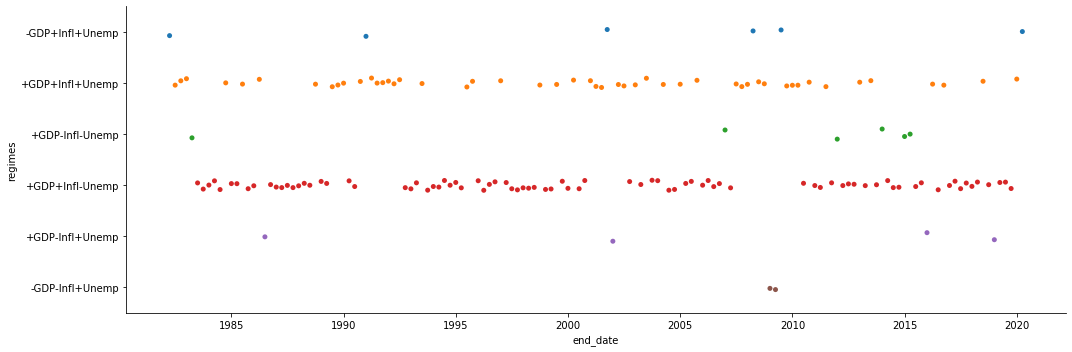

In [12]:
pl = combined_df.reset_index()
sns.catplot(data=pl,x='end_date',y='regimes', aspect=3)

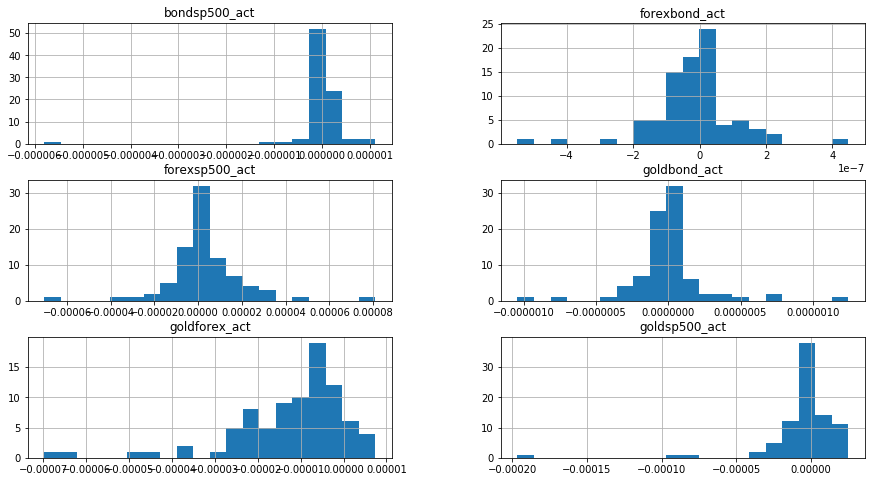

In [13]:
regimes_and_cov = combined_df[['bondsp500_act','goldsp500_act','forexsp500_act','goldbond_act',\
               'forexbond_act','goldforex_act','regimes']]
regimes_and_cov[regimes_and_cov.regimes=='+GDP+Infl-Unemp'].hist(bins=20,figsize=(15,8))
pass

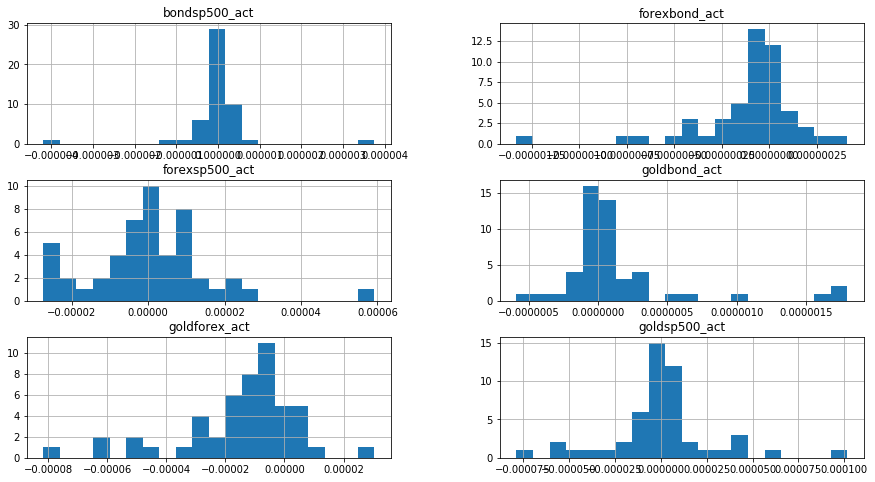

In [14]:
regimes_and_cov[regimes_and_cov.regimes=='+GDP+Infl+Unemp'].hist(bins=20,figsize=(15,8))
pass